In [1]:
from include.customer_segmentation_functions import *

dataset: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci/data

In [2]:
data_file= R"DataSets\online_retail_II.csv"
main_data= pd.read_csv(data_file,encoding ='cp1252')
data= main_data#.sample(10000)



https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge

# `General view of the data:`

In [3]:
data.sample(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
643803,546429,22747,POPPY'S PLAYHOUSE BATHROOM,1,2011-03-13 15:25:00,2.10,17611.0,United Kingdom
310244,519617,22498,WOODEN REGATTA BUNTING,3,2010-08-19 09:10:00,5.95,14540.0,United Kingdom
139108,502746,21640,ASSORTED TUTTI FRUTTI FOB NOTEBOOK,1,2010-03-26 12:53:00,1.66,NaN,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice,1067371,53628,537434,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,1067371,5305,85123A,5829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1062989,5698,WHITE HANGING HEART T-LIGHT HOLDER,5918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1067371.0,NaN,NaN,NaN,9.938898,172.705794,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,1067371,47635,2010-12-06 16:57:00,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1067371.0,NaN,NaN,NaN,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,NaN,NaN,NaN,15324.638504,1697.46445,12346.0,13975.0,15255.0,16797.0,18287.0
Country,1067371,43,United Kingdom,981330,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# `Data Preprocessing:`
which involves removing null data, duplicates, unwanted column, etc

In [6]:
#cahnging col name
data.rename(columns = {x:x.lower().replace(' ','') for x in data.columns}, inplace = True)

#change datatype
data['quantity'] = pd.to_numeric(data['quantity'])
data['price'] = pd.to_numeric(data['price'])
data["invoicedate"]=pd.to_datetime(data["invoicedate"])

#removing extra white spaces
data["description"]= data["description"].str.strip()
data.sample(3)

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
928009,571502,22350,ILLUSTRATED CAT BOWL,6,2011-10-17 15:18:00,2.55,14422.0,United Kingdom
246683,513276,21532,DAIRY MAID SUGAR JAM BOWL,6,2010-06-23 12:53:00,2.10,14543.0,United Kingdom
688738,550542,15044C,PURPLE PAPER PARASOL,2,2011-04-19 11:37:00,5.79,NaN,United Kingdom


In [7]:
for col_name in ["stockcode", "description", "quantity", "price", "customerid"]:
    get_value_counts(data, col_name)

****************************************
column name: stockcode
****************************************
    number of 'NaN' value: 0
percentage of 'NaN' value: 0.0%
   number of unique value: 5305
    number of total value: 1067371 (including none)
   number of total Values: 1067371


*******************************************
column name: description
*******************************************
    number of 'NaN' value: 4382
percentage of 'NaN' value: 0.41%
   number of unique value: 5655
    number of total value: 1067371 (including none)
   number of total Values: 1062989


**************************************
column name: quantity
**************************************
    number of 'NaN' value: 0
percentage of 'NaN' value: 0.0%
   number of unique value: 1057
    number of total value: 1067371 (including none)
   number of total Values: 1067371


********************************
column name: price
********************************
    number of 'NaN' value: 0
percentage of 'NaN

In [8]:
data= drop_nun_val_in_col(data, "customerid")
data= drop_canceled_items(data)

***************************************************************
droping rows where customerid = NaN
***************************************************************
Row counts before droping 'NaN' values: 1067371
 Row counts after droping 'NaN' values: 824364
----------------------------------------
                      Total rows droped: 243007
              Percentage of droped rows: 22.77%


******************************************************
droping rows of canceled items
******************************************************
Number of rows before droping canceled items: 824364
 Number of rows after droping canceled items: 805620


----------------------------------------
                           Total rows droped: 18744
                   Percentage of droped rows: 2.27%




## checking stockcode and description relationships

In [9]:
check_relationship_type(data, "stockcode", "description")

***********************************************************************************************
Checking relationship for 	stockcode -to- description
***********************************************************************************************
*many-to-many


In [10]:
descr= recheck_relationship_type(data, "description", "stockcode")
stockc= recheck_relationship_type(data, "stockcode", "description")

***************************************************************************************************
rechecking relationship for 	description -to- stockcode
***************************************************************************************************


100%|██████████| 5241/5241 [05:44<00:00, 15.21it/s]


*39 'description' are related to more than one 'stockcode'
['BATHROOM METAL SIGN', 'GINGHAM HEART DECORATION', 'COLOURING PENCILS BROWN TUBE', 'COLUMBIAN CANDLE ROUND', 'HEART T-LIGHT HOLDER', 'FAIRY CAKE PLACEMATS', 'BLUE FLOCK GLASS CANDLEHOLDER', 'RETRO PLASTIC POLKA TRAY', 'PINK FLOCK GLASS CANDLEHOLDER', "RETRO PLASTIC 70'S TRAY", 'PINK JEWELLED PHOTO FRAME', 'PASTEL BLUE PHOTO ALBUM', 'PASTEL PINK PHOTO ALBUM', 'METAL SIGN,CUPCAKE SINGLE HOOK', 'ACRYLIC JEWEL SNOWFLAKE,BLUE', 'EAU DE NILE JEWELLED PHOTOFRAME', 'RETRO PLASTIC DAISY TRAY', 'FROSTED WHITE BASE', 'FRENCH FLORAL CUSHION COVER', 'BLACK SILOUETTE CANDLE PLATE', 'WHITE BAMBOO RIBS LAMPSHADE', 'PINK FLOWERS RABBIT EASTER', 'ROSE DU SUD CUSHION COVER', 'SQUARE CHERRY BLOSSOM CABINET', 'COLUMBIAN CANDLE RECTANGLE', 'MODERN CHRISTMAS TREE CANDLE', 'This is a test product.', 'FRENCH PAISLEY CUSHION COVER', 'PINK FAIRY CAKE CUSHION COVER', 'FRENCH LATTICE CUSHION COVER', 'SET OF 4 FAIRY CAKE PLACEMATS', 'WATERING CAN PINK BUNN

100%|██████████| 4631/4631 [05:28<00:00, 14.08it/s]

*599 'stockcode' are related to more than one 'description'
['21232', '21523', '22350', '22349', '22195', '22353', '48173C', '21181', '22139', '22352', '85014A', '85014B', '22333', '85232B', '22321', '21955', '84899E', '85123A', '22029', '20754', '21035', '82001S', '21041', '35916B', '22180', '22241', '22199', '22083', '21485', '21928', '85099B', '22356', '20724', '21592', '20725', '21217', '84946', '22090', '22179', '22232', '82486', '21212', '21707', '21710', '21708', '21706', '21711', '20752', '48185', '84997D', '84997C', '71477', '47591D', '84997A', '21245', '21241', '21584', '47591A', '84997B', '84951A', '21244', '20675', '48187', '22080', '82600', '21588', '21818', '48111', '20685', '48194', '21495', '20677', '20676', '21175', '22197', '21238', '21240', '21239', '21498', '21537', '20718', '21539', '21527', '21533', '21531', '20914', '21242', '21535', '21844', '22073', '22072', '20682', '48129', '20622', '21122', '21124', '21004', '21500', '72801E', '21980', '22071', '22070', '215

In [11]:
print(len(stockc))
for val in random.sample(stockc, 5):
    print(f"{val}: {data[data["stockcode"]==val]["description"].unique()}")

599
22736: ['RIBBON REEL, MAKING SNOWMEN' 'RIBBON REEL MAKING SNOWMEN']
23029: ['DRAWER KNOB CRACKLE GLAZE GREEN' 'DOORKNOB CRACKED GLAZE GREEN']
22699: ['ROSES REGENCY TEACUP AND SAUCER' 'TEACUP AND SAUCER REGENCY ROSES']
22139: ['RETRO SPOT TEA SET CERAMIC 11 PC' '11 PC CERAMIC TEA SET POLKADOT'
 'RETROSPOT TEA SET CERAMIC 11 PC']
79051A: ['SMOKEY GREY COLOUR D.O.F. GLASS' 'SMOKEY GREY COLOUR GLASS']


In [12]:
print(len(descr))
for val in random.sample(descr, 5):
    print(f"{val}: {data[data["description"]==val]["stockcode"].unique()}")

39
RETRO PLASTIC DAISY TRAY: ['79190D' '79191D']
BLACK SILOUETTE CANDLE PLATE: ['72780' '72781']
BATHROOM METAL SIGN: ['82580' '21171']
COLUMBIAN CANDLE ROUND: ['72127' '72128' '72130' '72129']
PINK JEWELLED PHOTO FRAME: ['84708B' '84712B']


##### Here we can see that the stock code and product description don't have a 'one-to-one' relationship due to errors such as typing mistakes and the use of different synonymous words for the same product code. However, we can safely assume that they indeed have a one-to-one relationship and we can drop one of this 2 columns

## checking customer and country relationships(if any customer is associated with more than one country)
very few customer made purched from more than one contry

In [13]:
check_relationship_type(data, "customerid", "customerid")

***********************************************************************************************
Checking relationship for 	customerid -to- customerid
***********************************************************************************************
*many-to-many


In [14]:
cust_list= recheck_relationship_type(data, "customerid", "country")

**********************************************************************************************
rechecking relationship for 	customerid -to- country
**********************************************************************************************


100%|██████████| 5881/5881 [00:08<00:00, 725.27it/s]

*13 'customerid' are related to more than one 'country'
[12417.0, 12455.0, 12422.0, 12431.0, 12745.0, 12370.0, 12429.0, 12423.0, 12449.0, 12457.0, 12652.0, 12413.0, 12394.0]


In [15]:
print(len(cust_list))
for val in random.sample(cust_list, 5):
    print(f"{val}: {data[data["customerid"]==val]["country"].unique()}")

13
12413.0: ['Spain' 'France']
12429.0: ['Denmark' 'Austria']
12455.0: ['Cyprus' 'Spain']
12652.0: ['Germany' 'France']
12417.0: ['Belgium' 'Spain']


In [16]:
data.drop(columns=['stockcode'], inplace= True)

#

In [17]:
data['customerid']= data['customerid'].astype(np.int64).astype("string")
data['quantity']= data['quantity'].astype(np.int64)
data["invoicetime"]= data["invoicedate"].dt.time
data["invoicedate"]= data["invoicedate"].dt.date

##### cleaning quantity and unitprice
##### since we have quantity and unit price, we will calculate the total price 

In [18]:
print(data[data["price"]<0]["price"].count())
print(data[data["quantity"]<0]["quantity"].count())

0
0


In [54]:
data["totalprice"]= data["quantity"]* data["price"]
data.sample(3)

,invoice,description,quantity,invoicedate,price,customerid,country,invoicetime,totalprice
159780,504623,ASSORTED TUTTI FRUTTI HEART BOX,2,2010-04-15,1.25,14656,United Kingdom,12:10:00,2.50
995386,576615,GLITTER CHRISTMAS TREE WITH BELLS,5,2011-11-15,0.79,17231,United Kingdom,16:42:00,3.95
717118,553384,SMALL POPCORN HOLDER,20,2011-05-16,0.85,16899,United Kingdom,15:53:00,17.00


In [20]:
print(f"before cleaning 0 price iteams:\n{data[data["price"] ==0]}")
data= data[data["price"] !=0.0]

before cleaning 0 price iteams:
        invoice                     description  quantity invoicedate  price customerid         country invoicetime  totalprice
4674     489825                6 RIBBONS EMPIRE        12  2009-12-02    0.0      16126  United Kingdom    13:34:00         0.0
6781     489998             DOOR MAT FAIRY CAKE         2  2009-12-03    0.0      15658  United Kingdom    11:19:00         0.0
16107    490727                          Manual         1  2009-12-07    0.0      17231  United Kingdom    16:38:00         0.0
18738    490961   CHRISTMAS PUDDING TRINKET POT         1  2009-12-08    0.0      14108  United Kingdom    15:25:00         0.0
18739    490961     CHRISTMAS CRAFT WHITE FAIRY        12  2009-12-08    0.0      14108  United Kingdom    15:25:00         0.0
...         ...                             ...       ...         ...    ...        ...             ...         ...         ...
1004540  577129     HANGING METAL HEART LANTERN         4  2011-11-17   

In [21]:
print(f"row count before removing duplicates:{len(data)}")
data.drop_duplicates(inplace= True)
print(f" row count after removing duplicates:{len(data)}")

row count before removing duplicates:805549
 row count after removing duplicates:779282


# `Exploratory data analysis (EDA):`

**********************************************************************************************************
Descriptive Stats for ['quantity', 'price', 'totalprice'] :
**********************************************************************************************************
               count       mean         std    min   25%    50%    75%       max    IQR  lower bound  upper bound
quantity    779282.0  13.490720  145.869100  1.000  2.00   6.00  12.00   80995.0  10.00      -13.000       27.000
price       779282.0   3.218750   29.678852  0.001  1.25   1.95   3.75   10953.5   2.50       -2.500        7.500
totalprice  779282.0  22.294482  227.447832  0.001  4.95  12.48  19.80  168469.6  14.85      -17.325       42.075 




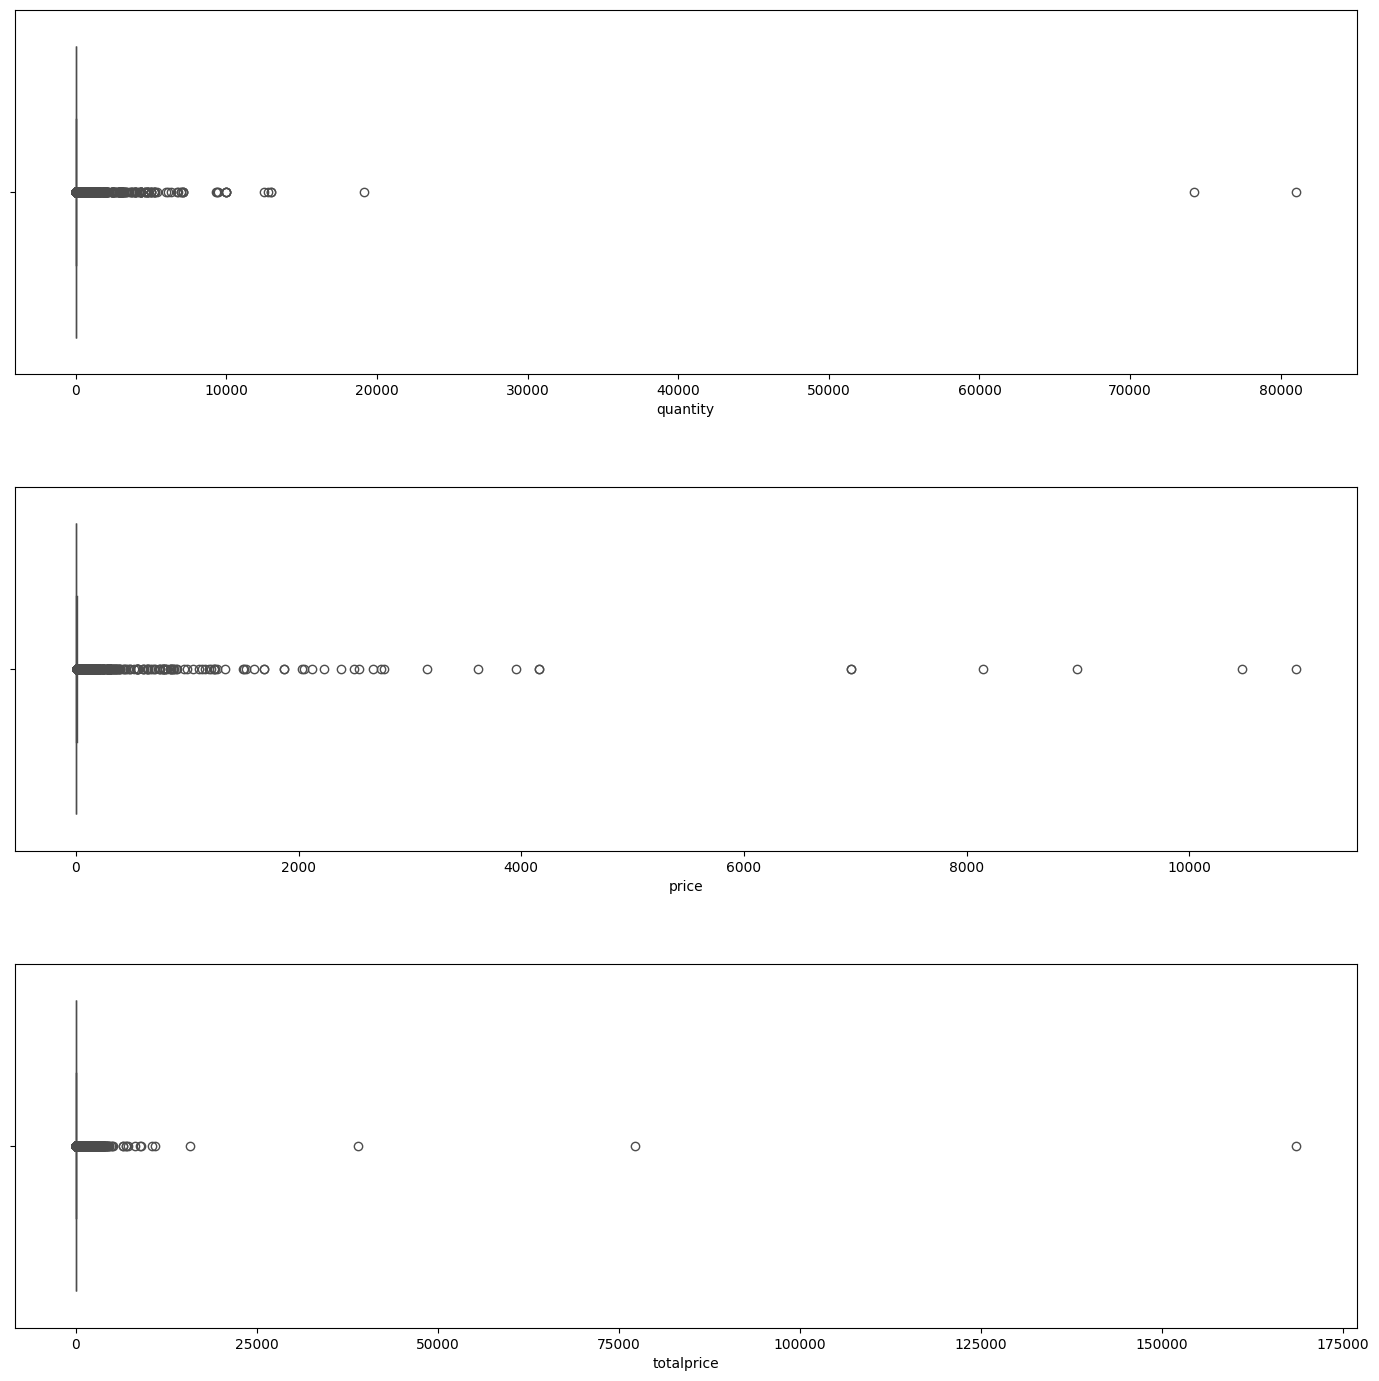

*******************************************************************************************************************
Descriptive Stats for ['description', 'customerid', 'country'] :
*******************************************************************************************************************
              count unique                                 top    freq
description  779282   5241  WHITE HANGING HEART T-LIGHT HOLDER    5016
customerid   779282   5878                               17841   12429
country      779282     41                      United Kingdom  700260 




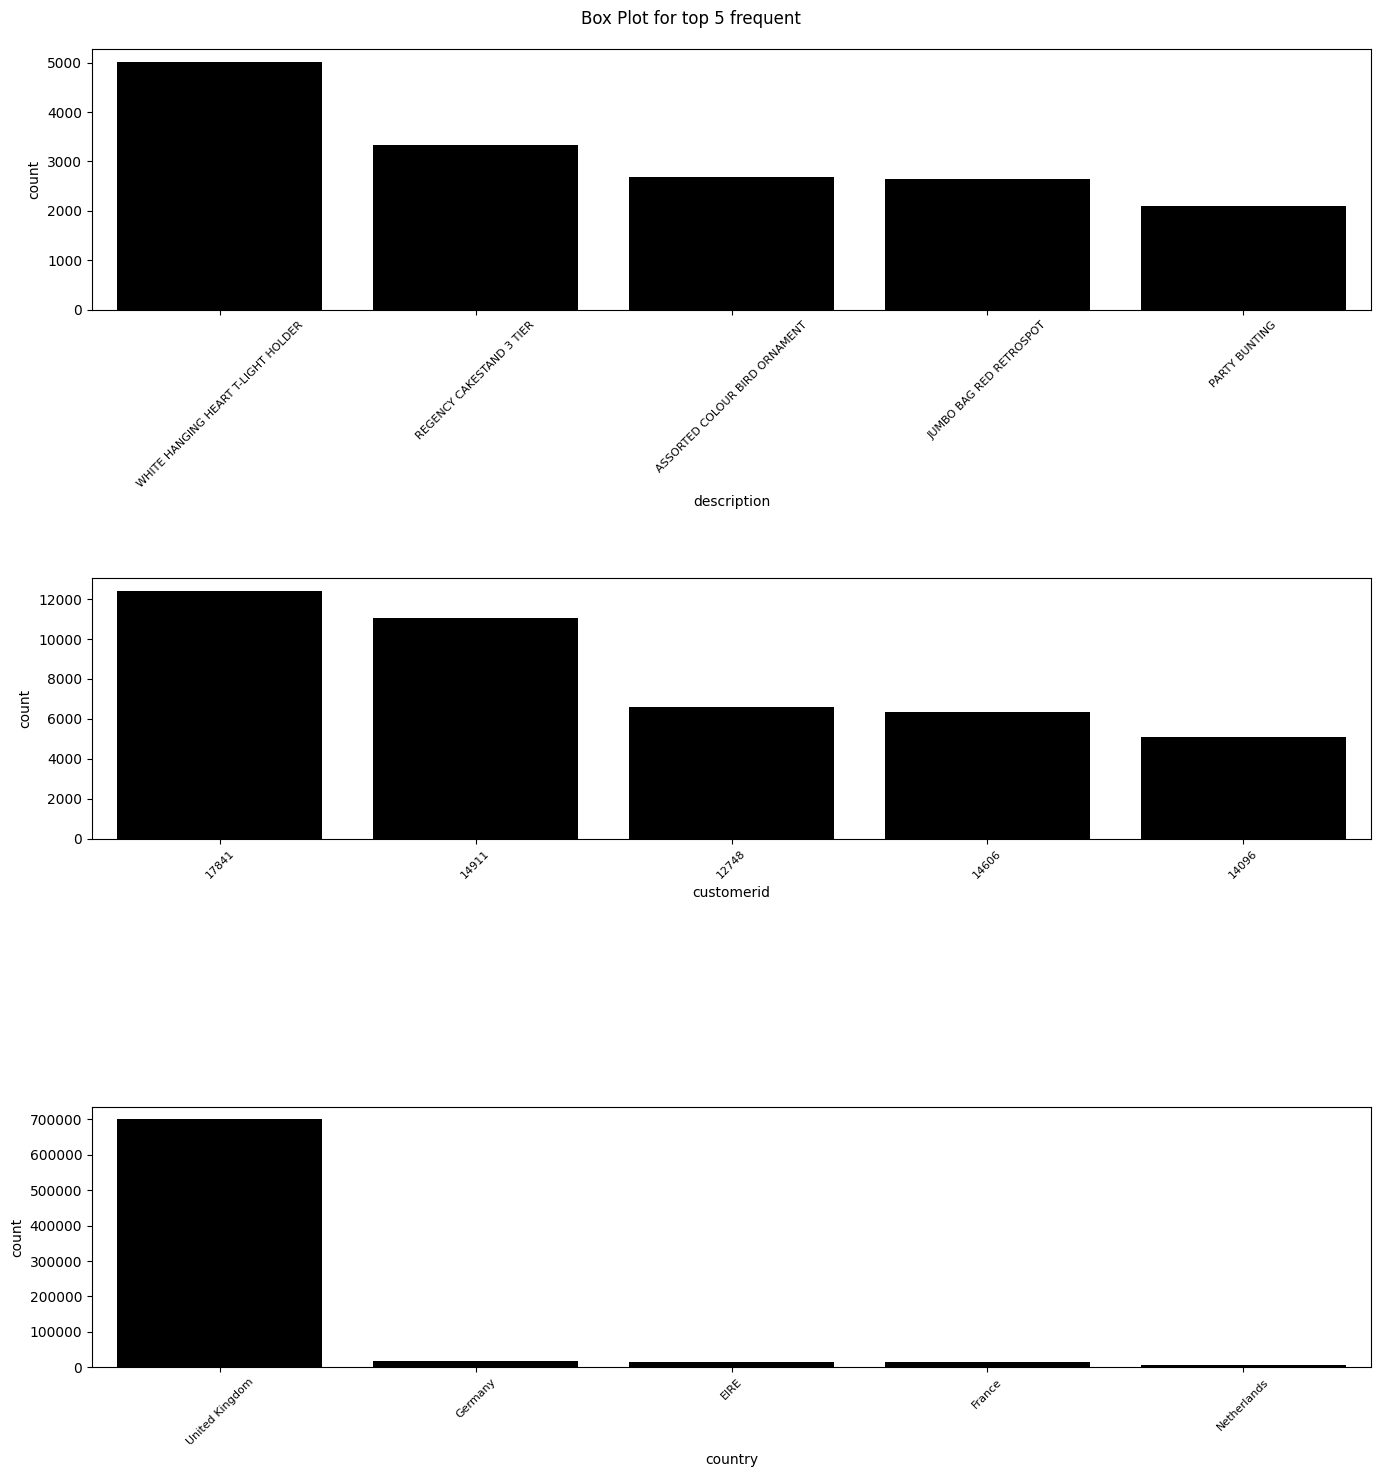

In [24]:
get_descriptive_stats(data, ['quantity', 'price', 'totalprice', 'description', 'customerid', 'country'] )

# RFM

*****************************************
RFMT dataset prepartion
*****************************************
*Date starts from: 2009-12-01 to 2011-12-09
We are only conside the customers who made more than one purchase
*Here:
    T --> Interpurchase Time
    L --> Shopping Cycle
    F --> Frequency
    T1 --> First purchase
    Tn --> Last purchase

    T = L/(F-1) = (Tn - T1)/(F-1)
    
Sample data:
      customerid  recency  frequency  monetary  interpurchase_time
1954      14322      429          4    474.10                  57
3288      15666      472          2    632.94                  11
1203      13564      144         37  16484.32                  16


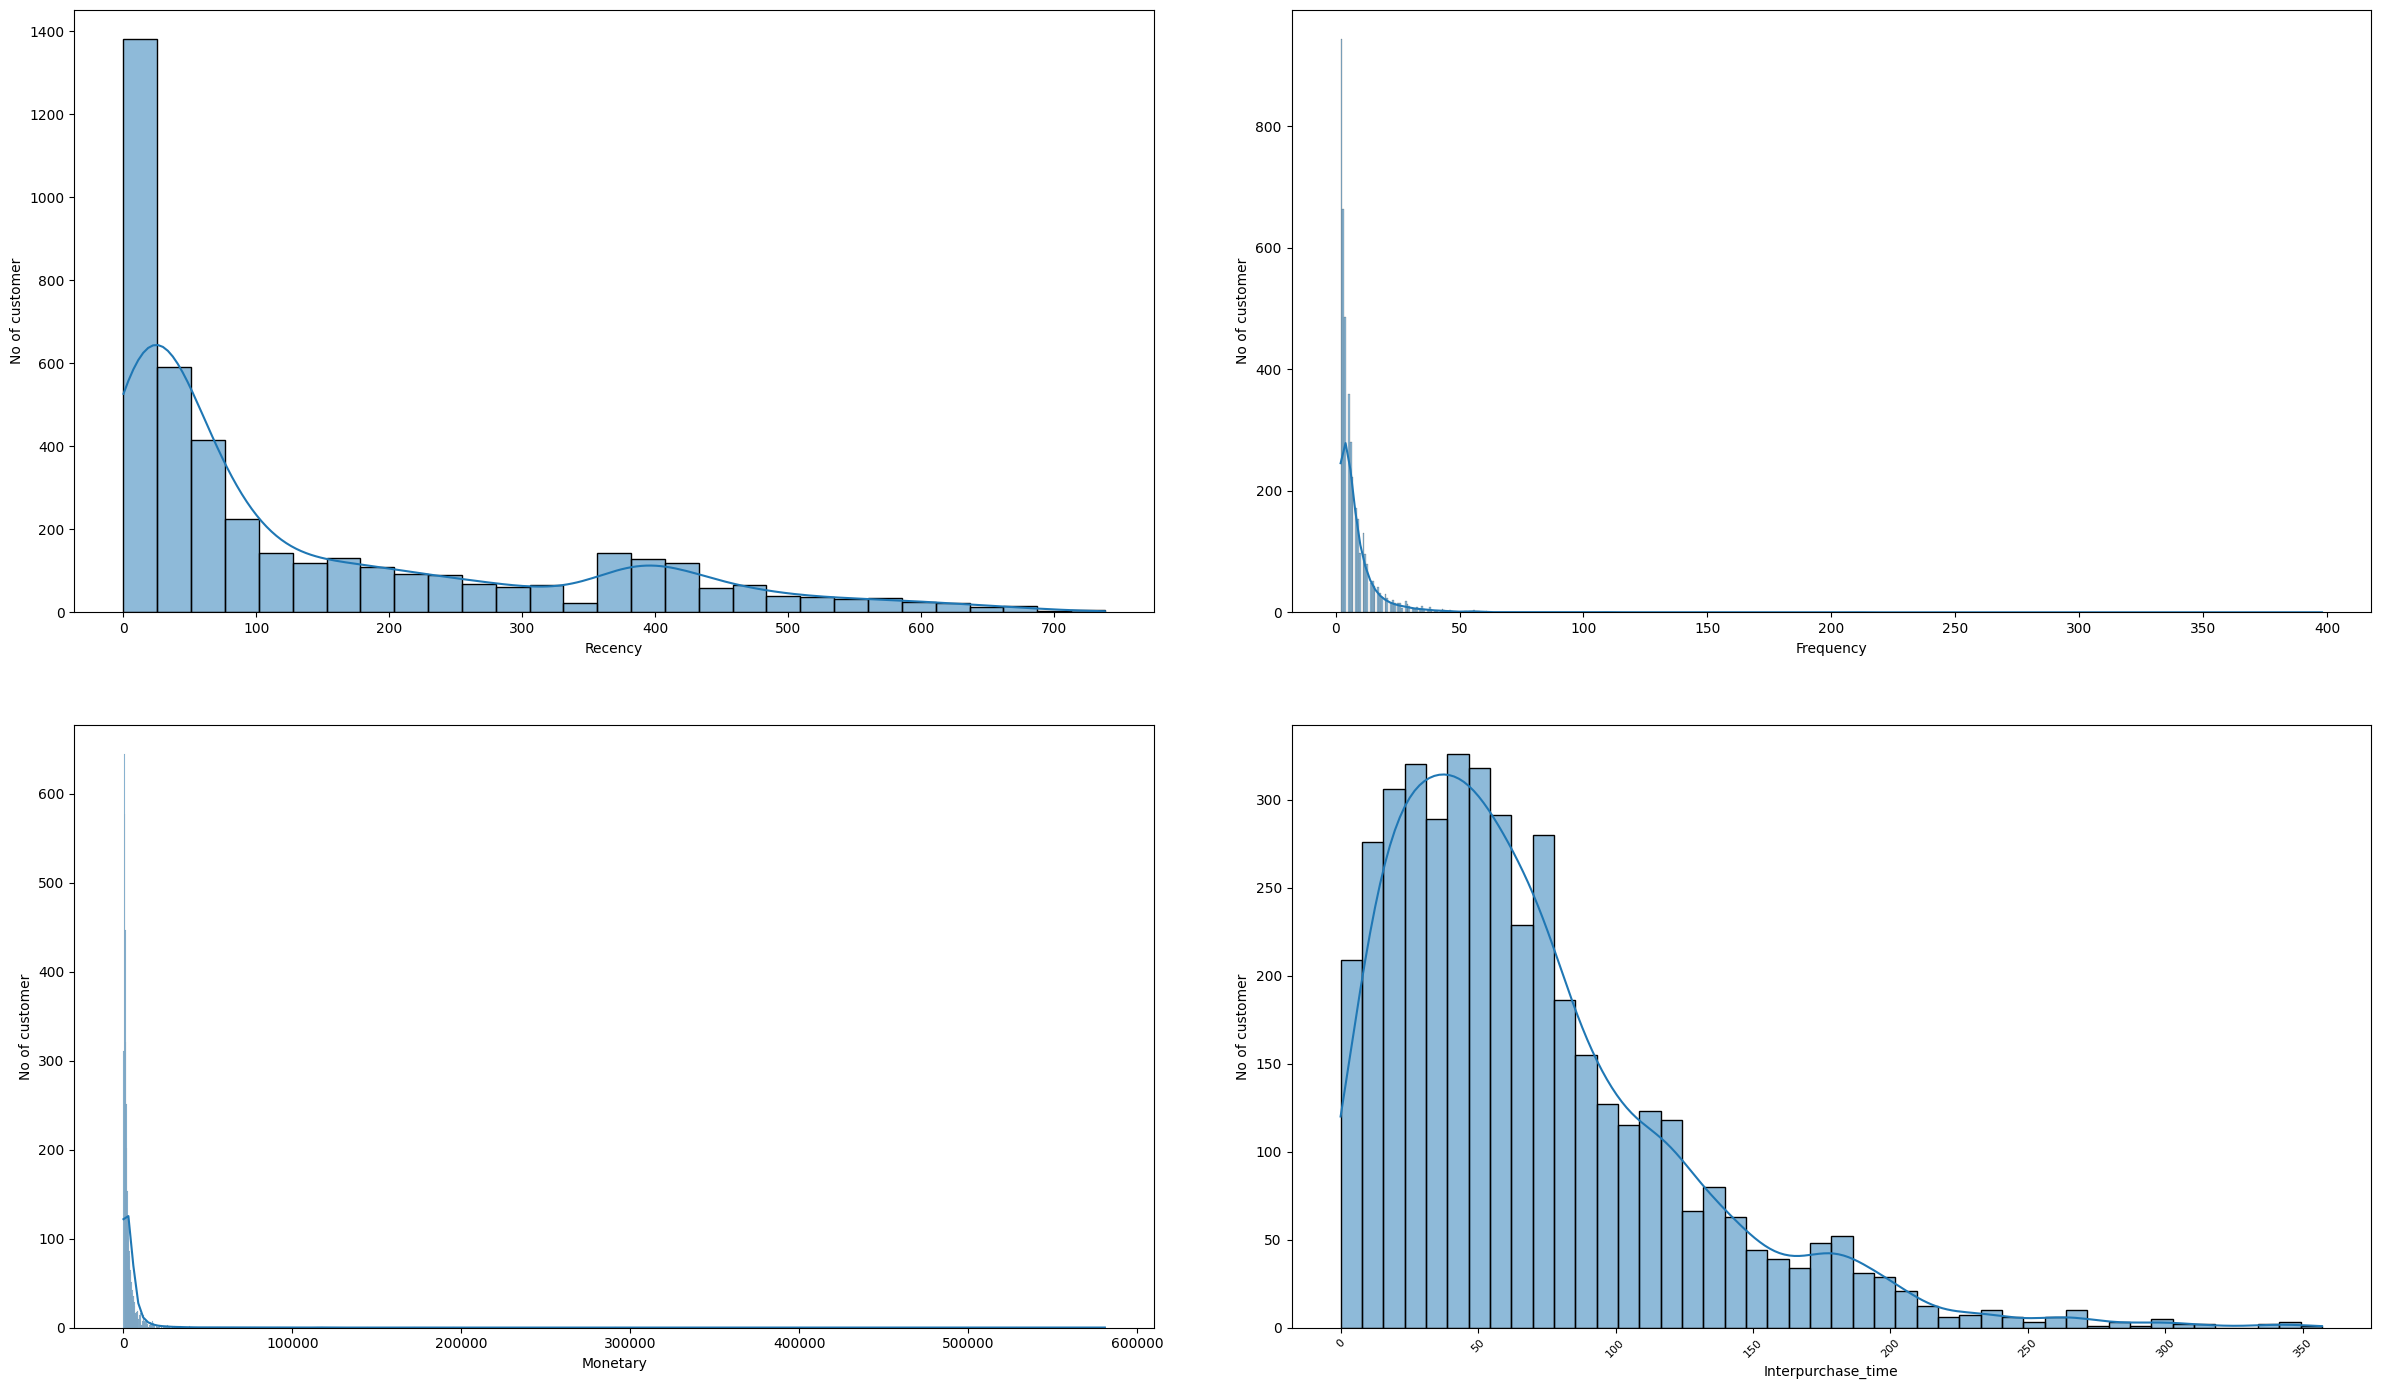

In [155]:
def get_rfm_dfset(df):
    header_print("RFMT dataset prepartion")
    max_date= df["invoicedate"].max()
    min_date= df["invoicedate"].min()

    hint_print(f"Date starts from: {min_date} to {max_date}")

    RFM = df.groupby('customerid').agg({
                'invoicedate': lambda x: (max_date - x.max()).days, 
                'invoice': lambda x: x.nunique(), 
                "totalprice": lambda x: x.sum()
        }).reset_index()
    RFM.rename(columns= {
        "invoicedate": "recency",
        "invoice": "frequency",
        "totalprice": "monetary"
    }, inplace= True)

    Shopping_Cycle = df.groupby('customerid').agg({'invoicedate': lambda x: ((x.max() - x.min()).days)}).reset_index()
    Shopping_Cycle.rename(columns= {
        "invoicedate": "shopping_cycle",
    }, inplace= True)
    RFM= RFM.merge(Shopping_Cycle, on='customerid', how='right', indicator=True)

    warning_print("We are only conside the customers who made more than one purchase")
    RFM= RFM[(RFM["_merge"]== "both") & (RFM["frequency"]>1)]
    RFM["interpurchase_time"] = RFM["shopping_cycle"] // RFM["frequency"]
    RFM.drop(columns=['shopping_cycle', '_merge'], inplace= True)
    
    hint_print("""Here:
    T --> Interpurchase Time
    L --> Shopping Cycle
    F --> Frequency
    T1 --> First purchase
    Tn --> Last purchase

    T = L/(F-1) = (Tn - T1)/(F-1)
    """)
    print("Sample data:\n",RFM.sample(3))


    cols= ["recency",  "frequency",  "monetary", "interpurchase_time"]
    i=1
    fig= plt.figure(figsize=(25,15))
    for col in cols:
        plt.subplot(2,2,i)
        sns.histplot(data = RFM[col], kde = True)
        plt.ylabel('No of customer' )
        plt.xlabel(col.capitalize())
        i+=1
    fig.tight_layout(pad=5.0)
    plt.xticks(rotation=45,fontsize=8)
    plt.show()

    return RFM

RFM= get_rfm_dfset(data)

In [180]:
RFM_with_score= rfm_score_calculate(RFM)

*************************************************
dfT score :                
*************************************************
*calculating R,F,M,T score based on quartiles
rfm_score= R+F+M
*rfm_score: Label
       > 1: Silver
       > 3: Gold
       > 5: Platinum
       > 9: Diamond
sample:
     customerid  recency  frequency  monetary  interpurchase_time  R  F  M  T  df_score  rfm_score     label
2401      14771      621          2    594.62                  57  4  1  1  3         9          6  Platinum
4910      17307      395         11   3999.89                  26  4  4  4  1        13         12   Diamond
279       12626       23          9   6620.48                  33  2  4  4  2        12         10   Diamond
4388      16778       74          2    245.94                 100  3  1  1  4         9          5      Gold


  Platinum  Diamond  Gold  Silver
      2987      648   552      68


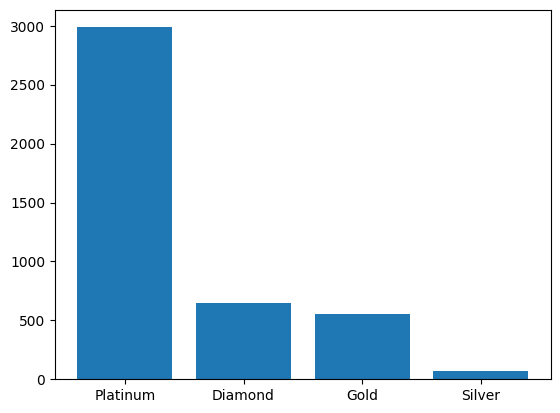

In [189]:
barplot = dict(RFM_with_score['label'].value_counts())
bar_names = list(barplot.keys())
bar_values = list(barplot.values())
plt.bar(bar_names,bar_values)
print(pd.DataFrame(barplot, index=[' ']))